# Trabalho 1

### Alunos (Nome e número usp):
 - Lucas Henrique Mantovani Jacintho - 10258942
 - Vinicius Henrique Borges - 9771546

## Descrição
Esse trabalho visa empregar técnicas de Redes Neurais para a resolução de problemas de classificação em dois conjuntos de dados distintos: Iris e MNIST

## Metodologia
Iremos produzir e treinar modelos de **MLP** e **SVM** com diferentes configurações para cada conjunto de dados.

Para a avaliação desses modelos no conjunto Iris utilizaremos duas técnicas: **Holdout** e **Cross-Validation**. Já para a avaliação do conjunto MNIST utilizaremos apenas o **Holdout** para poder comparar com os valores do site http://yann.lecun.com/exdb/mnist/

Para medir o desempenho dos modelos criados, utilizaremos a **Acurácia** e **Matriz de Cofusão**.

Optamos por escolher dois métodos de validação e desempenho para poder comparar as combinações que geram melhores resultados para os conjuntos de dados citados anteriormente. Ou seja, buscamos a combinação onde o modelo treinado apresenta a mais alta **generalização**.

Também iremos avaliar o impacto do **pré-processamento** dos dados nos resultados, comparando os **dados brutos** e **processados**

# Importação de bibliotecas auxiliares

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importação de métodos de validação, medidas de desempenho e método de pré-processamento

## Métodos de validação

In [0]:
from sklearn.model_selection import train_test_split # Holdout
from sklearn.model_selection import StratifiedKFold # Cross-validation

skf = StratifiedKFold(shuffle=True, random_state=42)

## Medidas de desempenho

In [0]:
from sklearn.metrics import accuracy_score # Acurácia
from sklearn.metrics import confusion_matrix, plot_confusion_matrix # Matriz de confusão

## Método de pré-processamento

In [0]:
from sklearn.preprocessing import StandardScaler # Normaliza os dados deixando com média 0 e desvio 1
scaler = StandardScaler()

# Definições auxiliares

## Funções para plots

In [0]:
from pandas.plotting import scatter_matrix

# Iris

Vamos iniciar a exploração do dataset Iris carregando seus dados

In [0]:
from sklearn.datasets import load_iris

In [0]:
iris = load_iris()

In [0]:
iris_X = iris.data
iris_y = iris.target

Com os dados carregados, vamos ver quais são as características do conjunto de dados: **Domínio dos valores, quantidade de características, número de classes, distribuição das classes**

In [0]:
iris_data = pd.DataFrame(iris_X, columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
len(iris.target[iris.target == 0]), len(iris.target[iris.target == 1]), len(iris.target[iris.target == 2])

(50, 50, 50)

Podemos ver que o dataset **não possui valores faltantes**, está no domínio dos **números reais positivos** e possui **três classes** com a **mesma quantidade de exemplos**.

Não será preciso fazer um pré-processamento para substituir valores faltantes. Mas é possível fazer um pré-processamento para normalizar os dados e deixá-los na mesma escala, já que a feature 'sepal length' possui valores no intervalo [4.3, 7.9] e a feature 'petal length' está no intervalo [1, 6.9].

Podemos aproveitar a possibilidade de realizar pré-processamento para **avaliar o impacto causado**.

Podemos agora fazer gráficos para visualizar como as classes estão dispostas no espaço e avaliar se o problema é linearmente separável ou não.

Como o conjunto de dados possui 4 características, não será possível fazer o plot com todas as variáveis simultaneamente. Por isso, vamos produzir uma matriz que relaciona cada par de variáveis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68322dfd30>,
      dtype=object)

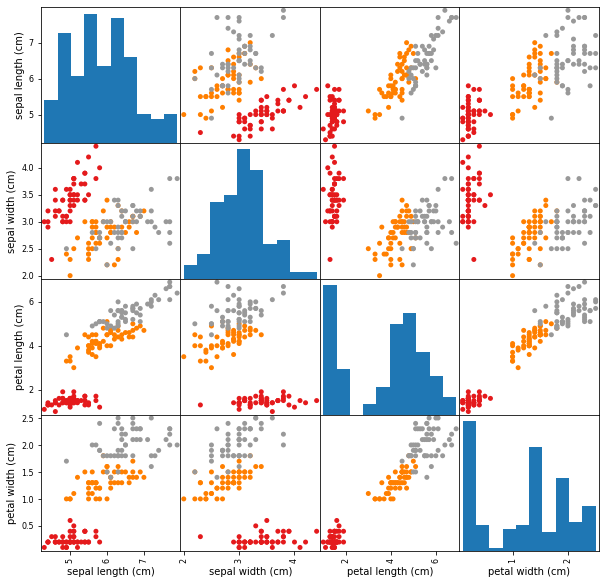

In [0]:
scatter_matrix(iris_data, alpha=1, figsize=(10, 10), c=iris_y, cmap='Set1', s=100)

Com esses gráficos é possível notar que existe uma classe (representada na cor vermelha) que pode ser facilmente separada das demais com apenas uma reta. Portanto esperamos no mínimo uma acurácia de aproximadamente 33%, já que existem 150 exemplos no total e 50 exemplos para cada classe.

## MLP

In [0]:
from sklearn.neural_network import MLPClassifier

Para tentar encontrar a melhor MLP possível, vamos utilizar a técnica Grid Search. Essa técnica cria classificadores combinando os valores passados para os parâmetros de maneira exaustiva. Ou seja, testa todas as combinações possíveis utilizando o método de validação 5-Fold Cross-Validation. Além disso, vamos utilizar o modelo padrão do sklearn como base, e apenas modificar alguns parâmetros. Utilizamos um random_state fixo e igual a 42 para garantir que os resultados sejam reproduzíveis.

Neste caso testaremos 8 possibilidades para a quantidade de camadas escondidas e de neurônios em cada camada, 4 possibilidades para a função de ativação e 3 possibilidades para o *solver* utilizado na correção dos pesos.

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
parameters = {
    'hidden_layer_sizes': [(5,),(20,),(20,20),(50,),(50,50),(100,),(100,100),(150,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
}

mlp = MLPClassifier(random_state=42, max_iter=1000)

clf = GridSearchCV(mlp, parameters, cv=skf, n_jobs=-1)
clf.fit(iris_X, iris_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_ch...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                        

Então obtemos os melhores parâmetros e a melhor acurácia média de teste obtida para esse estimador, considerando as 5 iterações do Cross-Validation.

In [0]:
f'Params: {clf.best_params_} | Score: {clf.best_score_:.2%}'

"Params: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'solver': 'adam'} | Score: 98.67%"

Armazenando o melhor estimador (modelo) em uma variável:

In [0]:
mlp = clf.best_estimator_

### Holdout

In [0]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, stratify=iris_y, random_state=42)

#### Sem normalização

In [0]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

##### Acurácia

In [0]:
print(f'Acurácia no treino: {accuracy_score(mlp.predict(X_train), y_train):.2%}')
print(f'Acurácia no teste: {accuracy_score(mlp.predict(X_test), y_test):.2%}')

Acurácia no treino: 98.21%
Acurácia no teste: 100.00%


##### Matriz de confusão

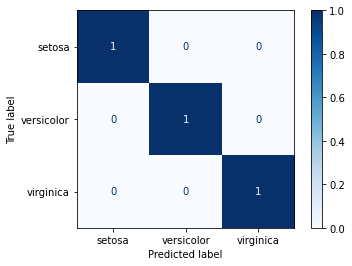

In [0]:
plot_confusion_matrix(mlp, X_test, y_test, display_labels=iris.target_names, cmap='Blues', normalize='true')

#### Com Normalização

In [0]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### Acurácia

In [0]:
print(f'Acurácia no treino: {accuracy_score(mlp.predict(X_train), y_train):.2%}')
print(f'Acurácia no teste: {accuracy_score(mlp.predict(X_test), y_test):.2%}')

Acurácia no treino: 98.21%
Acurácia no teste: 94.74%


#### Matriz de confusão

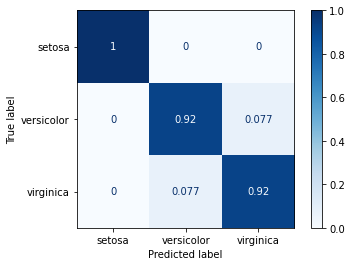

In [0]:
plot_confusion_matrix(mlp, X_test, y_test, display_labels=iris.target_names, cmap='Blues', normalize='true')

### Cross-validation

#### Sem normalização

##### Acurácia

In [0]:
mlps = []

for train_index, test_index in skf.split(iris_X, iris_y):
    X_train, X_test = iris_X[train_index], iris_X[test_index]
    y_train, y_test = iris_y[train_index], iris_y[test_index]

    mlp.fit(X_train, y_train)
    mlps.append(mlp)
    
    print(f'Acurácia no treino: {accuracy_score(mlp.predict(X_train), y_train):.2%}')
    print(f'Acurácia no teste: {accuracy_score(mlp.predict(X_test), y_test):.2%}')
    print()

Acurácia no treino: 98.33%
Acurácia no teste: 100.00%

Acurácia no treino: 99.17%
Acurácia no teste: 100.00%

Acurácia no treino: 100.00%
Acurácia no teste: 93.33%

Acurácia no treino: 97.50%
Acurácia no teste: 100.00%

Acurácia no treino: 97.50%
Acurácia no teste: 100.00%



##### Matriz de confusão

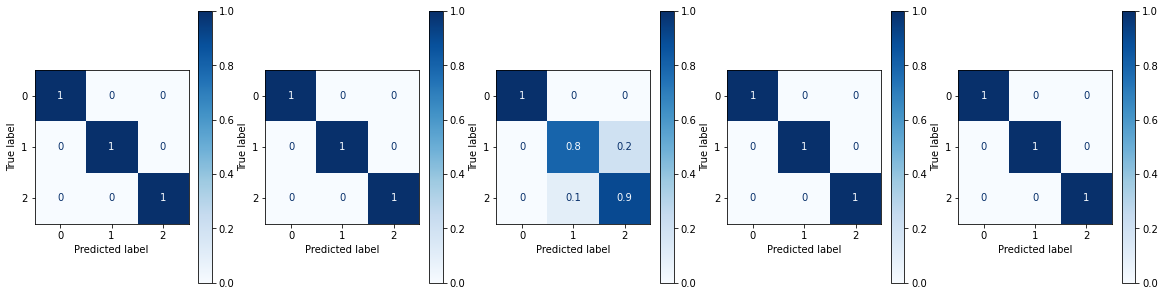

In [0]:
plt.figure(figsize=(20, 5))

i = 0
for train_index, test_index in skf.split(iris_X, iris_y):
    X_train, X_test = iris_X[train_index], iris_X[test_index]
    y_train, y_test = iris_y[train_index], iris_y[test_index]
    
    plot_confusion_matrix(mlps[i], X_test, y_test, cmap='Blues', normalize='true', ax=plt.subplot(1, 5, i+1))
    i += 1

#### Com normalização

##### Acurácia

In [0]:
mlps = []

for train_index, test_index in skf.split(iris_X, iris_y):
    X_train, X_test = iris_X[train_index], iris_X[test_index]
    y_train, y_test = iris_y[train_index], iris_y[test_index]

    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    mlp.fit(X_train, y_train)
    mlps.append(mlp)
    
    print(f'Acurácia no treino: {accuracy_score(mlp.predict(X_train), y_train):.2%}')
    print(f'Acurácia no teste: {accuracy_score(mlp.predict(X_test), y_test):.2%}')
    print()

Acurácia no treino: 98.33%
Acurácia no teste: 100.00%

Acurácia no treino: 97.50%
Acurácia no teste: 100.00%

Acurácia no treino: 100.00%
Acurácia no teste: 90.00%

Acurácia no treino: 97.50%
Acurácia no teste: 100.00%

Acurácia no treino: 97.50%
Acurácia no teste: 93.33%



##### Matriz de confusão

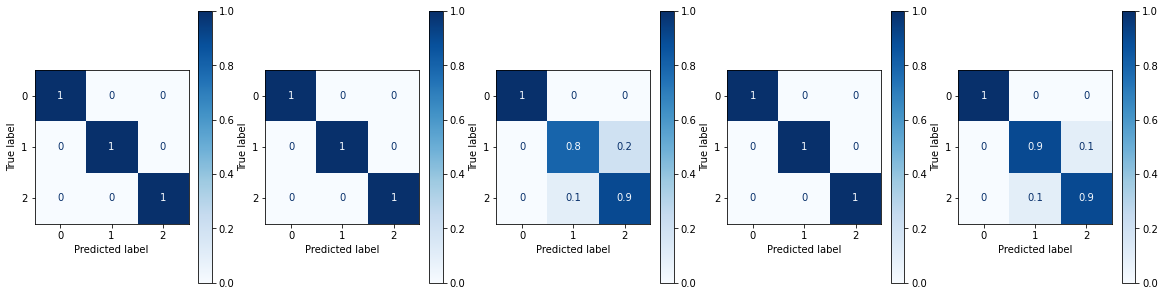

In [0]:
plt.figure(figsize=(20, 5))

i = 0
for train_index, test_index in skf.split(iris_X, iris_y):
    X_train, X_test = iris_X[train_index], iris_X[test_index]
    y_train, y_test = iris_y[train_index], iris_y[test_index]

    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    plot_confusion_matrix(mlps[i], X_test, y_test, cmap='Blues', normalize='true', ax=plt.subplot(1, 5, i+1))
    i += 1

Com os resultados obtidos para a MLP podemos notar duas coisas:

1. A normalização está afetando negativamente a performance do modelo. Isso provavelmente ocorre pois apesar de os dados possuírem valores diferentes de máximo e mínimo para cada coluna, os valores estão em uma escala similar. Com isso, ao efetuarmos o pré-processamento os dados ficam muito próximos, aumentando a dificuldade do problema
2. Dada a variação de performance entre modelos treinados e testados utilizando o método Cross-Validation, observamos que é um método mais confiável para avaliar a generalização do modelo. Isso ocorre pois, esse método reparte o conjunto de dados em diferentes grupos e, como ocorre variação do resultado, nota-se que a performance depende dos dados utilizados para treino e teste.

## SVM

Vamos agora criar modelos de SVM e avaliá-los

In [0]:
from sklearn.svm import SVC

Vamos então, utilizar a mesma abordagem do Grid Search para encontrar o melhor modelo para SVM

In [0]:
parameters = {
    'C': [1.0, 0.5, 0.1, 2.0],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [1, 3, 5]
}

svm = SVC(random_state=42)

clf = GridSearchCV(svm, parameters, cv=skf, n_jobs=-1)
clf.fit(iris_X, iris_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1.0, 0.5, 0.1, 2.0], 'degree': [1, 3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
f'Params: {clf.best_params_} | Score: {clf.best_score_:.2%}'

"Params: {'C': 1.0, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'} | Score: 98.67%"

Armazenando o melhor estimador (modelo) em uma variável:

In [0]:
svm = clf.best_estimator_

### Holdout

In [0]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, stratify=iris_y, random_state=42)

#### Sem normalização

In [0]:
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

##### Acurácia

In [0]:
print(f'Acurácia no treino: {accuracy_score(svm.predict(X_train), y_train):.2%}')
print(f'Acurácia no teste: {accuracy_score(svm.predict(X_test), y_test):.2%}')

Acurácia no treino: 98.21%
Acurácia no teste: 100.00%


##### Matriz de confusão

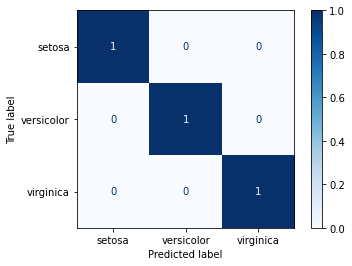

In [0]:
plot_confusion_matrix(svm, X_test, y_test, display_labels=iris.target_names, cmap='Blues', normalize='true')

#### Com Normalização

In [0]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

#### Acurácia

In [0]:
print(f'Acurácia no treino: {accuracy_score(svm.predict(X_train), y_train):.2%}')
print(f'Acurácia no teste: {accuracy_score(svm.predict(X_test), y_test):.2%}')

Acurácia no treino: 96.43%
Acurácia no teste: 97.37%


#### Matriz de confusão

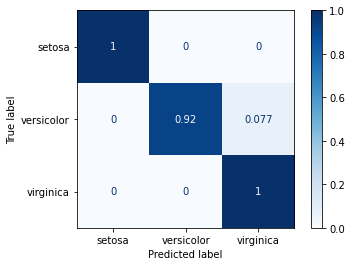

In [0]:
plot_confusion_matrix(svm, X_test, y_test, display_labels=iris.target_names, cmap='Blues', normalize='true')

### Cross-validation

In [0]:
skf = StratifiedKFold(shuffle=True, random_state=42)

#### Sem normalização

##### Acurácia

In [0]:
svms = []

for train_index, test_index in skf.split(iris_X, iris_y):
    X_train, X_test = iris_X[train_index], iris_X[test_index]
    y_train, y_test = iris_y[train_index], iris_y[test_index]

    svm.fit(X_train, y_train)
    svms.append(svm)
    
    print(f'Acurácia no treino: {accuracy_score(svm.predict(X_train), y_train):.2%}')
    print(f'Acurácia no teste: {accuracy_score(svm.predict(X_test), y_test):.2%}')
    print()

Acurácia no treino: 99.17%
Acurácia no teste: 100.00%

Acurácia no treino: 98.33%
Acurácia no teste: 100.00%

Acurácia no treino: 100.00%
Acurácia no teste: 93.33%

Acurácia no treino: 98.33%
Acurácia no teste: 100.00%

Acurácia no treino: 96.67%
Acurácia no teste: 100.00%



##### Matriz de confusão

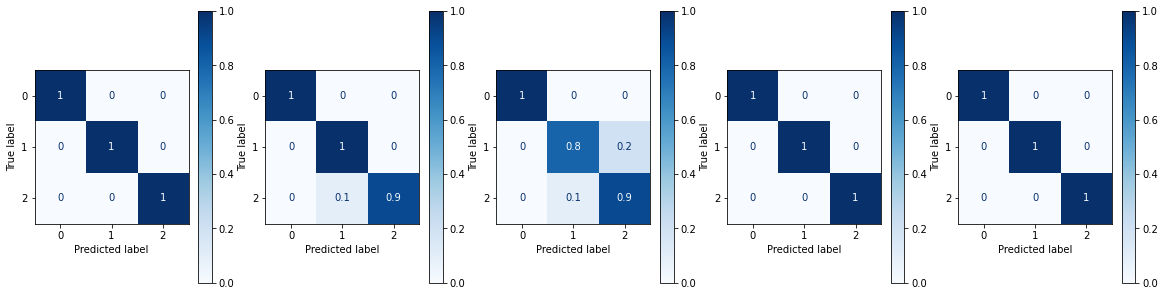

In [0]:
plt.figure(figsize=(20, 5))

i = 0
for train_index, test_index in skf.split(iris_X, iris_y):
    X_train, X_test = iris_X[train_index], iris_X[test_index]
    y_train, y_test = iris_y[train_index], iris_y[test_index]
    
    plot_confusion_matrix(svms[i], X_test, y_test, cmap='Blues', normalize='true', ax=plt.subplot(1, 5, i+1))
    i += 1

#### Com normalização

##### Acurácia

In [0]:
svms = []

for train_index, test_index in skf.split(iris_X, iris_y):
    X_train, X_test = iris_X[train_index], iris_X[test_index]
    y_train, y_test = iris_y[train_index], iris_y[test_index]

    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    svm.fit(X_train, y_train)
    svms.append(svm)
    
    print(f'Acurácia no treino: {accuracy_score(svm.predict(X_train), y_train):.2%}')
    print(f'Acurácia no teste: {accuracy_score(svm.predict(X_test), y_test):.2%}')
    print()

Acurácia no treino: 96.67%
Acurácia no teste: 100.00%

Acurácia no treino: 98.33%
Acurácia no teste: 100.00%

Acurácia no treino: 100.00%
Acurácia no teste: 86.67%

Acurácia no treino: 96.67%
Acurácia no teste: 100.00%

Acurácia no treino: 96.67%
Acurácia no teste: 96.67%



##### Matriz de confusão

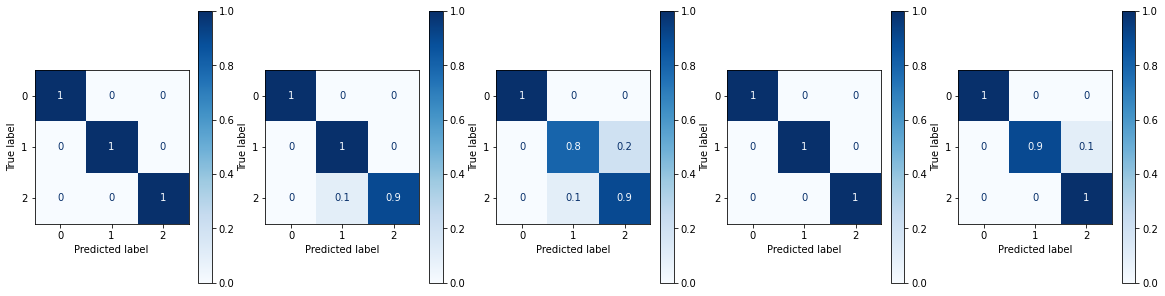

In [0]:
plt.figure(figsize=(20, 5))

i = 0
for train_index, test_index in skf.split(iris_X, iris_y):
    X_train, X_test = iris_X[train_index], iris_X[test_index]
    y_train, y_test = iris_y[train_index], iris_y[test_index]

    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    plot_confusion_matrix(svms[i], X_test, y_test, cmap='Blues', normalize='true', ax=plt.subplot(1, 5, i+1))
    i += 1

Com os testes para o modelo SVM, podemos perceber que a normalização também prejudica a performance dos modelos. Além disso, vemos mais uma vez a variação na performance de acordo com o conjunto de treino e teste utilizados

Avaliando agora os resultados para o conjunto Iris, os **melhores resultados** usando Cross-Validation com 5 folds foram:
- MLP com 2 camadas e 50 neurônios cada: acurácia média de 98.7%
- SVM de kernel linear com parâmetro de regularização 1: 98.7%

Nota-se, porém o poder da técnica SVM que mesmo com um modelo bem simples já alcançava resultados expressivos, cerca de 98%

Vale ressaltar também, que ambos os modelos apresentaram **boa taxa de generalização** do aprendizado, pois a variação da acurácia nos conjuntos de treino e teste foi **baixa**.

# MNIST

Começamos carregando os exemplos do dataset. Eles são originalmente separados em um conjunto de treino e outro de testes.

In [0]:
from tensorflow.keras.datasets.mnist import load_data

In [0]:
(X_train, y_train), (X_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


Representação da matriz referente à primeira imagem do conjunto de treino:

In [0]:
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


Podemos ver que as células possuem valores **inteiros positivos** entre 0 e 255 (um byte) e a grande maioria possui valor igual a **zero**, portanto cada célula representa o valor em escala de cinza de cada pixel das imagens, onde as posições de valor diferente de zero são os pixels onde há preenchimento com uma cor afim de representar os dígitos.

Por se tratar de imagens de tamanho 28x28, o dataset possui 70000 exemplos com atributos em 2 dimensões, ou seja, um array de 3 dimensões. Porém, para realizar o treinamento precisamos redimensioná-lo a uma matriz de 2 dimensões, onde cada exemplo possui uma dimensão de tamanho 784:

In [0]:
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

In [0]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

Por fim começamos o treinamento utilizando uma MLP e uma SVM. Fizemos testes sem e com normalização dos dados.

## MLP

Inicialização de uma MLP com parâmetros padrão do sklearn:


*   1 camada escondida com 100 neurônios
*   Função de ativação linear retificada
*   Taxa de aprendizado contínua e inicialmente igual a 0.0001

Utilizamos um random_state fixo e igual a 42 para garantir que os resultados sejam reproduzíveis.

In [0]:
mlp = MLPClassifier(random_state=42)

### Sem normalização

####Treinamento:

In [0]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

####Predição

In [0]:
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

####Acurácia

In [0]:
print(f'Acurácia no treino: {accuracy_score(y_train, y_pred_train):.2%}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_pred_test):.2%}')

Acurácia no treino: 99.34%
Acurácia no teste: 96.75%


####Matriz de confusão

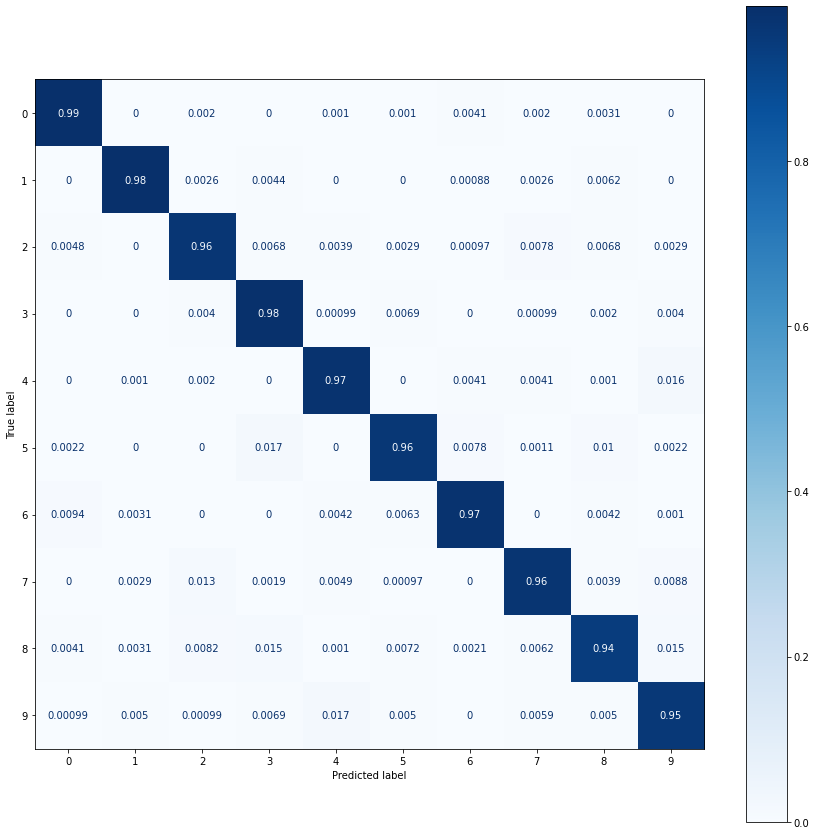

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(mlp, X_test, y_test, cmap='Blues', normalize='true', ax=ax)

####Acertos e erros da predição

A função abaixo obtém os índices de duas imagens pertencentes à determinada classe: uma que foi corretamente predita e de outra que foi erroneamente predita pelo modelo:

In [0]:
def get_hit_miss(y_test, y_pred, class_):
  hit, miss = None, None
  for i, (e1, e2) in enumerate(zip(y_test, y_pred)):
    if e1 == class_ and e2 == class_:
      hit = i
    elif e1 == class_ and e2 != class_:
      miss = i
    if hit != None and miss != None:
      break
  return hit, miss

A função abaixo obtém as imagens propriamente ditas e as desenha na tela:

In [0]:
def draw_correct_wrong_img(X, y_true, y_pred, class_):
  hit, miss = get_hit_miss(y_true, y_pred, class_)

  assert (hit != None and miss != None), "Classe informada não possui erros de predição"  
  
  correct_img = X[hit].reshape(28, 28)
  wrong_img = X[miss].reshape(28, 28)
  
  plt.subplot(121)
  plt.title(f'Correct. True = {y_pred[hit]}')
  plt.imshow(correct_img, cmap='Greys')
  plt.subplot(122)
  plt.title(f'Wrong. Predicted = {y_pred[miss]}')
  plt.imshow(wrong_img, cmap='Greys')

Agora iremos desenhar um exemplo correto e outro errado para a classe 3:

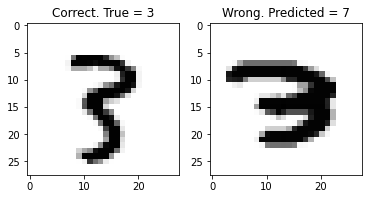

In [0]:
draw_correct_wrong_img(X_test, y_test, y_pred_test, class_=3)

###Com normalização

In [0]:
from sklearn.preprocessing import Normalizer
X_train = Normalizer().fit_transform(X_train)
X_test = Normalizer().fit_transform(X_test)

In [0]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

####Predição

In [0]:
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

####Acurácia

In [0]:
print(f'Acurácia no treino: {accuracy_score(y_train, y_pred_train):.2%}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_pred_test):.2%}')

Acurácia no treino: 100.00%
Acurácia no teste: 97.71%


####Matriz de confusão

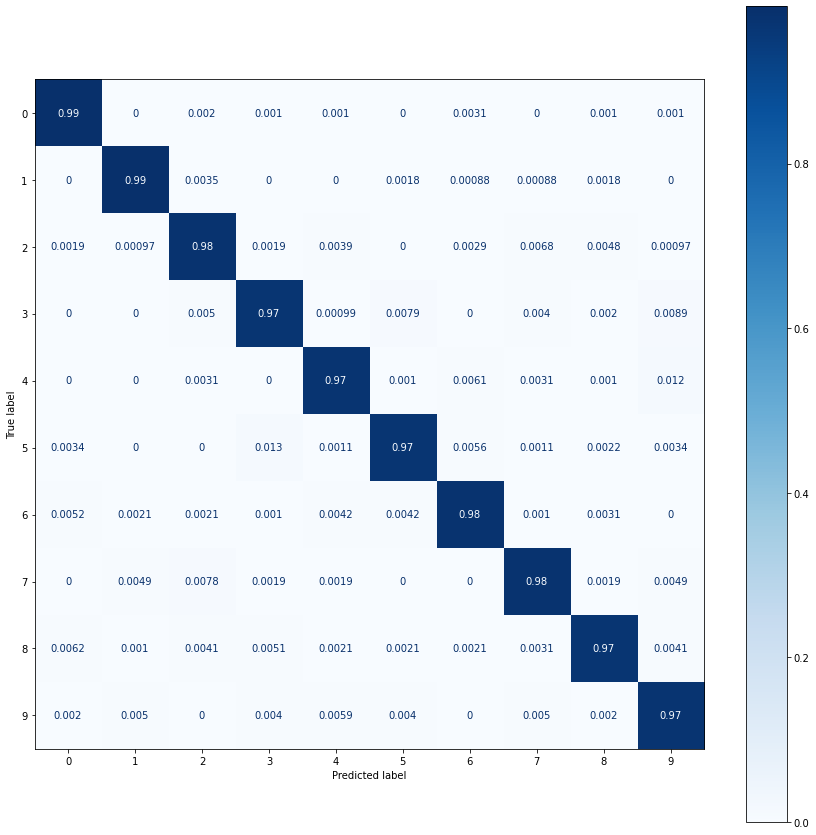

In [0]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(mlp, X_test, y_test, cmap='Blues', normalize='true', ax=ax)

####Acertos e erros da predição

Um exemplo correto e outro errado para a classe 2:

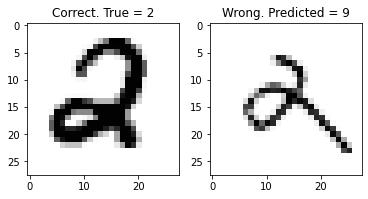

In [0]:
draw_correct_wrong_img(X_test, y_test, y_pred_test, class_=2)

## SVM

Inicialização de uma SVM classificadora (SVC) com os parâmetros padrão do sklearn:


*   Kernel *rbf*
*   Gamma *scale*
*   Termo independente do kernel igual a 0
*   Parâmetro de regularização igual a 1

Utilizamos um random_state fixo e igual a 42 para garantir que os resultados sejam reproduzíveis.

In [0]:
svm = SVC(random_state=42)

### Sem normalização

####Treinamento:

In [0]:
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

####Predição

In [0]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

####Acurácia

In [0]:
print(f'Acurácia no treino: {accuracy_score(y_train, y_pred_train):.2%}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_pred_test):.2%}')

Acurácia no treino: 98.99%
Acurácia no teste: 97.92%


####Matriz de confusão

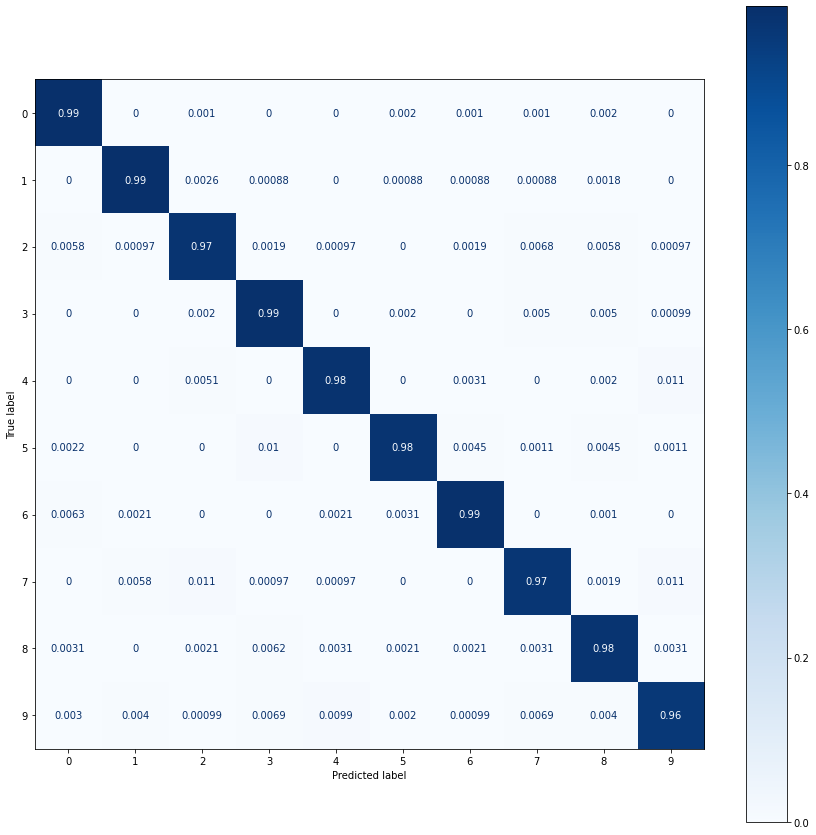

In [0]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(svm, X_test, y_test, cmap='Blues', normalize='true', ax=ax)

####Acertos e erros da predição

Abaixo estão exemplos de duas imagens: a primeira é uma predição correta e a segunda é uma predição errada do modelo para a classe 3.

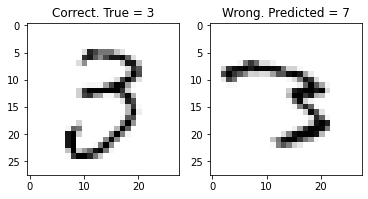

In [0]:
draw_correct_wrong_img(X_test, y_test, y_pred_test, class_=3)

###Com normalização

In [0]:
from sklearn.preprocessing import Normalizer
X_train_norm = Normalizer().fit_transform(X_train)
X_test_norm = Normalizer().fit_transform(X_test)

In [0]:
svm.fit(X_train_norm, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

####Predição

In [0]:
y_pred_train = svm.predict(X_train_norm)
y_pred_test = svm.predict(X_test_norm)

####Acurácia

In [0]:
print(f'Acurácia no treino: {accuracy_score(y_train, y_pred_train):.2%}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_pred_test):.2%}')

Acurácia no treino: 99.13%
Acurácia no teste: 98.11%


####Matriz de confusão

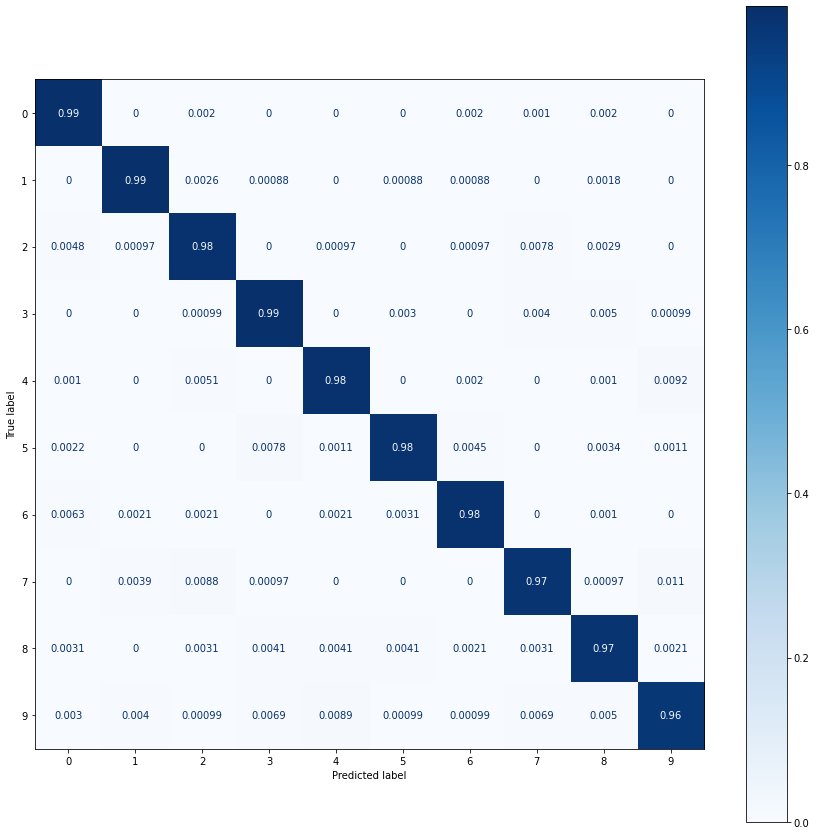

In [0]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(svm, X_test_norm, y_test, cmap='Blues', normalize='true', ax=ax)

####Acertos e erros da predição

Um exemplo correto e outro errado para a classe 2:

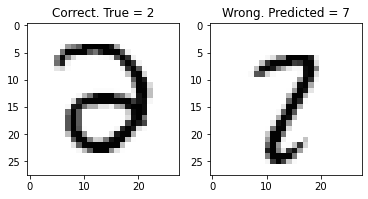

In [0]:
draw_correct_wrong_img(X_test, y_test, y_pred_test, class_=2)

Com os resultados obtidos, vamos comparar com os resultados listados no site do [MNIST](http://yann.lecun.com/exdb/mnist/)

Nesse site, os dois melhores modelos tem uma taxa de erro no conjunto de teste de 0.23%, o que corresponde a um score de 99.77%. A técnica utilizada foi um comitê de 35 redes neurais convolucionais. Um resultado muito expressivo, que utiliza uma técnica diferente das utilizadas por nós nesse trabalho.

Os nossos melhores modelos de MLP e SVM alcançaram, respectivamente, 97.71% e 98.11% de acurácia no conjunto de teste. O que é correspondente a uma taxa de erro de 2.29% e 1.89%.

A MLP consegue superar todos os classificadores lineares, os 2 primeiros KNNs da lista, ambos os classificadores não-lineares e 8 modelos de Redes Neurais.

Já a SVM supera todos os que a MLP supera, além de mais 2 KNNs. E também, se aproxima dos resultados das SVMs e Redes Convolucionais.

Além disso, é possível afirmar que os modelos alcançaram índices bons de generalização, pois a diferença de desempenho no conjunto de treino e teste não foi muito alta.

Também é importante notar que a normalização dos dados do MNIST contribuiu para uma pequena melhora na acurácia tanto do conjunto de treino quanto do conjunto de teste.